<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: **Theodore Margoles**

***

This assignment is due on Moodle by **5 PM on Friday November 30**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Ketelbells McKnowsNoStats. At various points in your day you catch Ketelbells making the following mistakes.  In each case, clearly explain to Ketelbells why his testing setup or conclusion is incorrect. 

**Part A**: Ketelbells has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Ketelbells wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \mu < 30$. 

Ketelbells clearly needs to review how to set up the null hypothesis correctly, because he has made a mistake in claiming that 

$H_0: \mu < 30$. instead his null hypothesis should be: $H_0: \mu = 30$ and $H_1: \mu < 30$ because what he really wants to see if he has enough evidence to claim that the mean is under 30 years old and if he doesn't than he cant reject the null hypothesis; that is he cannot conclude that $\mu < 30$

**Part B**: After the wonderful explanation you gave him after the previous debacle, Ketelbells has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \bar{x} = 30$.  

Ketelbells is just a little confused about what we are trying to state with the hypothesis; we want to state the null hypothesis in terms of the actual mean $\mu$ since that is the paramter we are trying to make claims about. so his null should still be  $H_0: \mu = 30$.

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

a p value is by definition: probabilty under $H_0$ that $P(X \le x \space | \space H_0)$ (for 1 tailed test like this)

so the p-value represents the probability that we get a test statistic at least as extreme as the one we measured given **that the null hypothesis is true.** So assuming that null hypothesis is true, 3% probability of calculating a test statistic X as extreme as the one we measured. 

there is a 3% chance that, **given $H_0$ is TRUE**;  we calculated $X$ as we did. This is not the same thing as saying theres a a 3% chance that the $H_0$ is true.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a normalized test-statistic of $z = -0.04$ for the mean age and concludes that since $z = -0.04 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

$z$ = $-0.04$ but at the alpha=0.05 significance level we choose $Z_{\alpha}$ = $Z_{0.05}$ = -1.64, and 
what we actually have is that $z$ = $-0.04 > -1.64$ so actually the measured test-statistic falls in the range in which we cannot reject the null hypothesis, we cannot assume the mean is less than 30.

In [7]:
stats.norm.ppf(0.05) #1 tailed test on left side since H1 is mu < 30

-1.6448536269514729

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas data frame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [2]:
nameList = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

dfMPG = pd.read_csv('data6/auto-mpg.data', delim_whitespace=True, header=0, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']) # note my data is in a folder called data6

dfMPG.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170.0,3563.0,10.0,70,1,dodge challenger se


In [28]:
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 95% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

to get a 95% CI for the mean: we first calculate the standard deviation and mean of our data, 
now noting the the mean is normally distributed, we can use the test statistic + or - our $Z_{\frac{\alpha}{2}}$
times the standard deviation divided by the square root of the length. 

we calculate the mean, $\hat{X}$ = $23.5284$
we calculate the $\sigma$ = $7.811$
we calculate $Z_{\frac{\alpha}{2}}$ with stats.norm.ppf for a two tailed so we divide alpha in half and subtract alpha /2 off from 1 and we get: 1.96. 

now we just take $\hat{X}$ + $(Z_{\frac{\alpha}{2}})(\frac{\sigma}{\sqrt{n}})$ as our upper bound and
$\hat{X}$ - $(Z_{\frac{\alpha}{2}})(\frac{\sigma}{\sqrt{n}})$ as our lower bound, 

values calculated in python below!

$\hat{X}$ + $(Z_{\frac{\alpha}{2}})(\frac{\sigma}{\sqrt{n}})$ = 24.29683
$\hat{X}$ - $(Z_{\frac{\alpha}{2}})(\frac{\sigma}{\sqrt{n}})$ = 22.7600

as calculated below, a 95% CI for the mean: $[ 22.7600\space,\space 24.2968 ]$ therefore at this level of $\alpha$ we can conclude that the mean is in fact greater than 20 since 20 is not contained in this confidence interval. 

In [4]:
stdev = np.std(dfMPG['mpg'])
mean = np.mean(dfMPG['mpg'])
print(mean, stdev)

zAlpha = stats.norm.ppf(1-(0.05/2)) 
print(zAlpha)
lo = mean - (1.96*(stdev/np.sqrt(len(dfMPG['mpg']))))
hi = mean + (1.96*(stdev/np.sqrt(len(dfMPG['mpg']))))

print('95% CI for the mean: [',lo,hi,']')



23.528463476070538 7.811070159367422
1.959963984540054
95% CI for the mean: [ 22.760091783637172 24.296835168503904 ]


**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

#1 
 - first I split the data up into two populations (2 arrays, mpgs_46, and mpgs_8) for 4,6 and 8 cylinder respectively
 - then I calculated the sample standard deviation, and the mean of both populations. 
 - noting that both populations have N > 30 and that the mean is normally distributed in this case, that we can setup a 
 - test statistic as follows $\frac{(\mu_1 - \mu_2) - C}{ \sqrt{\frac{\sigma_{1}^2}{102}} + \frac{\sigma_{2}^2}{288}}$
 - the test statistic I calculated was: 3.389.
 - then the p-value is 0.00035 which represents the probability that we would record a difference in means this great given that  - $H_0$ is true, that is the probabilty that we would observe the data we got given that we believe the null hypothesis is a smaller probability than our alpha level of 0.01, and therefore we can reject the null hypothesis and conclude that 4 and 6 cyllinder engines are indeed faster.

In [5]:
mpgs_46 = []
mpgs_8 = []
import math

for dataItem in dfMPG[['mpg', 'cylinders']].values:
    if dataItem[1] == 8:
        mpgs_8.append(dataItem[0])
    if dataItem[1] == 4 or dataItem[1] == 6:
        mpgs_46.append(dataItem[0])
avg_8_cyl = np.mean(mpgs_8)
avg_46_cyl = np.mean(mpgs_46)

std_8 = np.std(mpgs_8)
std_46 = np.std(mpgs_46)

sampleSigmaSquared8 = std_8*std_8;
sampleSigmaSquared46 = std_46*std_46;


sig8 = sampleSigmaSquared8 / 102
sig6 = sampleSigmaSquared46 / 288

mu_term = avg_46_cyl - avg_8_cyl - 10

print("average 8 cyllinder mpg: ", avg_8_cyl, " ||| average 4 or 6 cyllinder mpg: ", avg_46_cyl)
print("stdev 8 cyl: ", std_8, " ||| stdev 4,6 cyl: ", std_46)
print("len 8cyl: ", len(mpgs_8))
print("len 46cyl: ", len(mpgs_46))
m = 102
n = 288
print("difference in sample means - 10 = ", mu_term)
Z = (mu_term)/(math.sqrt(sig8 + sig6))
print("z = ", Z)

# so we have calculated our test statistic as 3.389...
val = 1 - stats.norm.cdf(3.389)
print("p value is: ", val)

average 8 cyllinder mpg:  14.933333333333334  ||| average 4 or 6 cyllinder mpg:  26.57395833333333
stdev 8 cyl:  2.8201423039235247  ||| stdev 4,6 cyl:  6.710650398883976
len 8cyl:  102
len 46cyl:  288
difference in sample means - 10 =  1.6406249999999964
z =  3.3891383417546836
p value is:  0.00035074005254964735


**Part D**: You decide to go with either a 4 or 6 cylinder engine, because if you buy an 8-cylinder vehicle that can haul heavy things, you just know you are going to get stuck helping people move. You just _know_ it.

Conduct an appropriate hypothesis test at the $\alpha=0.01$ significance level to determine if the mean gas mileage of vehicles with a 4-cylinder engine is significantly better than the gas mileage of vehicles with 6 cylinders. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

$\alpha$ = 0.01, and let $M_6$ represent the true mean of MPGs for 6 cyllinder cars and let $M_4$ represent the same except for the population of 4-cylinder cars. 


$H_0$: $M_6$ = $M_4$


$H_1$: $M_4$ - $M_6$ > 0

we have enough data points in both populations so we can invoke the CLT and claim the means are normally distributed. 
so we can use a z-distribution to solve this problem.

for testing the difference of means of two populations with a z-distrubution we use:
$z$ = $\frac{(\mu_4 - \mu_6)}{\sqrt{\frac{\sigma_4^2}{204} + \frac{\sigma_6^2}{84} }}$

however using python below I have nicely gone ahead and caluclated each of these values. 
$z$ = $\frac{(29.28676470 - 19.985714285)}{\sqrt{var(X) + var(Y)}}$ = $1.36$ as shown below in python.

next I calculate my $p$-value with: $1 - stats.norm.cdf(1.36)$ = $0.0869$, as we can see here the $p$-value is actually greater than the $alpha$ level; 0.01 < 0.089;  meaning that we do not have enough evidence to reject the null hypothesis at $\alpha$ = $0.01$.

In [35]:
four_cyl = []
six_cyl = []

for dataItem in dfMPG[['mpg', 'cylinders']].values:
    if dataItem[1] == 6:
        six_cyl.append(dataItem[0])
    if dataItem[1] == 4:
        four_cyl.append(dataItem[0])
        
mean_four = np.mean(four_cyl) 
std_four = np.std(four_cyl)

mean_six = np.mean(six_cyl)
std_six = np.std(six_cyl)
mu_diff = (29.2868 - 19.985714)
var4 = np.var(four_cyl)
var6  = np.var(six_cyl)
z = mu_diff /(np.sqrt( var4 + var6))
print("z = ", z)
p_val = 1 - stats.norm.cdf(z)
print("p = ", p_val)

z =  1.3600465847517682
p =  0.0869075913179913


---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute 95% t-confidence intervals for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

lets define our null hypothesis as $H_0: \space \mu_0 = 480$ since this is our average between the three groups... so the average overall. 

$t$ = $\frac{\hat{X}-\mu_0}{\frac{S}{\sqrt{n}}}$, 

for the first group, we have n = 10, recorded mean $\hat{X}$ = 451.3 and sample std = 31.9

so, $t_1$ = $\frac{451.3 -  480}{\frac{31.9}{\sqrt{10}}}$ = -2.8450585845402023 (as calculated in python below)

so, our first confidence interval will be defined by: $\hat{X}$ + $t_1(\frac{S}{\sqrt{n}})$ as upper bound and the following as the lower bound: $\hat{X}$ - $t_1(\frac{S}{\sqrt{n}})$ 

once we actually plug our values in, we get the first confidence interval, for the group of coffee and nap takers is:

95% CI = [451.3 -2.84505858(31.9/sqrt(10),  
          451.3 + 2.84505858(31.9/sqrt(10)]
          
**CI for mean reaction time  of group with nap and coffee: [422.6, 480] at the 95% level. **

for the second group, we have n = 10, recorded mean $\hat{X}$ = 494.2, and sample std = 39.6

so, $t_2$ = $\frac{494.2 -  480}{\frac{39.6}{\sqrt{10}}}$ = 0.9902081562143391

so, our next CI will be defined for the group that just had coffee by: $\hat{X}$ + $t_2(\frac{S}{\sqrt{n}})$ as upper bound and the following as the lower bound: $\hat{X}$ - $t_2(\frac{S}{\sqrt{n}})$ and were S now corresponds to the sample stdev of the second group which we have. 

then we plug in the values, and run the calculations in python to make sure and we get that the 


**95% CI for groups reaction time that only had coffee is**: **[480.0 508.4]**. (calculated in python below)

for the third group, we have n = 10, recorded mean $\hat{X}$ = 492.8, and sample std = 45.2

so, $t_3$ = $\frac{492.8 -  480}{\frac{45.2}{\sqrt{10}}}$ = 0.8955122577467984

so, our next CI will be defined for the group that just had coffee by: $\hat{X}$ + $t_3(\frac{S}{\sqrt{n}})$ as upper bound and the following as the lower bound: $\hat{X}$ - $t_3(\frac{S}{\sqrt{n}})$ and were S now corresponds to the sample stdev of the third group which we have. 

so we plug all these values in and let python do the nasty work:

**the 95% CI for groups reaction time that had only a nap is: [480.0 505.6] ** (calulated in python)

# comment on results
 - as we can see the 95% CI for the group who had a coffee and a nap encompasses the range from [422.6, 479.99] while the other   - other 2 CI's for coffee or nap group have a lower bound is actually starting at 480, the highest point in the range of the coffee and nap group. 
 - finally the groups that only had coffee and only had a nap appeared to perform about identically; basically the same range was covered in the CI. 
 - since ALL 3 CI's technically hold the value 480 though, at this confidence level we cannot yet claim that they are actually different yet.
 

# comment on t-distribution
 - we used the t-distribution because the data is normal, the size of the data is < 30 and the true standard deviation is not known so we just use the sample stdev. 
 - under these set of conditions a t-dist should be the best possible fit. 
 

In [46]:
print((451.3 + 494.2 + 492.8)/3)

t1 = (451.3-480)/(31.9/math.sqrt(10))
t2 = (494.2-480)/(39.6/math.sqrt(10))
t3 = (492.8-480)/(45.2/math.sqrt(10))

print("t1: ", t1, "\nt2: ", t2, "\nt3: ", t3)

val = 451.3 -2.84505858*(31.9/math.sqrt(10))
print(val)

val2 = 451.3 + 2.84505858*(31.9/math.sqrt(10))
print(val2)


hi2 = 494.2 +  1.1339480498583574 *(39.6/math.sqrt(10))
lo2 = 494.2 -  1.1339480498583574 *(39.6/math.sqrt(10))

print(lo2, hi2)

hi3 = 492.8 + 0.8955122577467984*(45.2/math.sqrt(10))
lo3 = 492.8 - 0.8955122577467984*(45.2/math.sqrt(10))

print(lo3, hi3)


479.43333333333334
t1:  -2.8450585845402023 
t2:  1.1339480498583574 
t3:  0.8955122577467984
422.6000000458001
479.99999995419995
480.0 508.4
480.0 505.6


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

we are comparing the taking a nap group to the drinking coffee group, 

taking a nap group: has t = 0.8955122577467984,  $\hat{X}$ = 492.8, $\hat{S}$ = 45.2
taking coffee group: has t = 1.1339480498583574, $\hat{X}$ = 494.2, $\hat{S}$ = 39.6 

we can use pythons build in stats.t.sf() function to take in the t-statistic and to output us a 1 sided pvalue result, 
as we can see both the p-value of the nap taking group was 0.8955122577467984 which is greater than 0.05 so we cannot reject the null hypothesis;

that is; we cannot conclude that taking a nap promotes a faster reaction time than drinking coffee at this confidence level. 

In [60]:
print(t1, t2, t3)
pval1 = stats.t.sf(np.abs(t1), 9) #this function does essentially just the 1 - cdf except apparently slightly more accurate... 
pval2 = stats.t.sf(np.abs(t2), 9) #coffee group
pval3 = stats.t.sf(np.abs(t3), 9) #nap group
print("just coffee-nap pval: ", pval1)


-2.8450585845402023 1.1339480498583574 0.8955122577467984
just coffee-nap pval:  0.009621840868959132


**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

again lets make use of our calculated t-statistics and make use of pythons stats.t.sf() function again
we know that the t-stat for the coffee-nap group was -2.8450585845402023. 

we know that pval1 for the coffe-nap group was 0.009. 

since the pval1 says that the probability of getting the result we got with the null hypothesis being true is a smaller percent cance than the alpha value so we can reject the null hypothesis, therefore the coffee-nap is better than coffee or the nap group. 

In [61]:
print("probability that we observed difference in means given H0 is true: ", pval1)
print(pval1, " is less than ", 0.05, " which is our alpha value")
print("therefore we can reject the null hypothesis in this case and conclude that for both, the coffee-nap is supieror to just coffee or just a nap")

probability that we observed difference in means given H0 is true:  0.009621840868959132
0.009621840868959132  is less than  0.05  which is our alpha value
therefore we can reject the null hypothesis in this case and conclude that for both, the coffee-nap is supieror to just coffee or just a nap


**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

$\alpha$ = 0.05, 

we can define the CI as: $\sqrt{\frac{(9)S^2}{\chi^2_{0.025, \space 9}}}$ $\leq \sigma \leq$ $\sqrt{\frac{(9)S^2}{\chi^2_{1-0.025, \space 9}}}$

now lets plug in the sample std which is: $31.9$

$\sqrt{\frac{9158.49}{\chi^2_{0.025, \space 9}}}$ $\leq \sigma \leq$ $\sqrt{\frac{9158.49}{\chi^2_{1-0.025, \space 9}}}$

ok, now we need to solve for the values of the chi squared distribution that you will need. 

thanks to stats.chi2.ppf() python has calculated both of the chi values we need so we can just plug in:

$\chi^2_{0.025, \space 9}$ == $2.700$ ,  $chi^2_{1-0.025, \space 9}$ == $19.023$

now we plug it all in and we have:


$\sqrt{\frac{9158.49}{2.700}}$ $\leq \sigma \leq$ $\sqrt{\frac{9158.49}{19.023}}$

therefore, after we simplify  **the 95% CI for the standard deviation of the coffee and nap group is: $[21.94181,  58.2412]$

In [66]:
(31.9**2)*(9)
alpha = 0.05
leftChiVal = stats.chi2.ppf(alpha/2, 9)
rightChiVal = stats.chi2.ppf(1-(alpha/2), 9)

print(leftChiVal, rightChiVal)

hi = np.sqrt(9158.49/2.700)
lo = np.sqrt(9158.49/19.023)

print(lo, hi)

2.7003894999803584 19.02276779864163
21.941809179387615 58.241165281382656


---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [4]:
# Code to load
# Should appear here
# Name your dataframe
# Whatever is clever
dfOctopoda = pd.read_csv('data6/pootef.csv') #Octopoda is part of the class Cephalopoda, meaning that octopuses are cephalopods!!!!!!!!!!!
dfOctopoda.dropna(axis=0)
#she gets to tend to 4 groups of octopuses every day for 30 days. 

,Group,Date,Fed,Ate
0,1,Oct 1 2018,40,37
4,1,Oct 5 2018,40,36
6,1,Oct 7 2018,40,34
8,1,Oct 9 2018,40,35
14,1,Oct 15 2018,40,37
15,1,Oct 16 2018,40,37
17,1,Oct 18 2018,40,34
18,1,Oct 19 2018,40,39
19,1,Oct 20 2018,40,34
20,1,Oct 21 2018,40,34


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$. 

the standard octopus diet has pootef of 0.90
pootef is the proportion of octopuses that eat the food. 

$H_0:$ $\hat{P}$ = $0.90$
$H_1:$ $\hat{P}$ > $0.90$



In [80]:
ate_data = dfOctopoda['Ate'].values
mean = np.mean(ate_data)
std = np.std(ate_data)
var = np.var(ate_data)
print(mean, std, var)
print(.002/(1.862/math.sqrt(10)))
pval = 1 - stats.norm.cdf(0.0033966)
print(pval)


36.08870967741935 1.8622397924931842 3.467937044745058
0.0033966462515235014
0.4986449552558897


**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.01$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement?   

this forms a one tailed hypothesis test. 

now we need to get the mean of her data, and the stdev of her data, which thanks to python we have aquired easily below:

sample mean: 36.08870967741935
sample std: 1.8622397924931842 
sample var: 3.467937044745058, 

sample proportion: 36.08870967741935/40 = 0.902, so the proportion she actually achieved on average was only 0.902, 

note we have more than 30 data points and we are talking about mean POOTEF so it should be normally distributed and therefore we can use a Z statistic. 

z = $\frac{0.902 - 0.900}{\frac{1.862}{\sqrt{10}}}$ = $0.0033966$

so we have the Z-score, so to get the p-score I have to take
p_value = 1 - stats.norm.cdf(0.0033966) = 0.4986449552558897

so as we can see the p-value of 0.4986 is larger than the alpha level we are at which is 0.01, so we cannot reject the null hypothesis, we cannot conclude that her program is really any better than the program they have. 

this is because the probability of her getting that score with the null hypothesis being assumed to be true is still higher than the alpha level we are testing against. 


**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.01$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [11]:
team1 = []
team2 = []

team3 = []

team4 = []

for octopod in dfOctopoda.values:
    if octopod[0] == 1:
        team1.append(octopod[3]/40)
    elif octopod[0] == 2:
        team2.append(octopod[3]/40)
    elif octopod[0] == 3:
        team3.append(octopod[3]/40)
    elif octopod[0] == 4:
        team4.append(octopod[3]/40)
        
mean_team1 = np.mean(team1)
mean_team2 = np.mean(team2)
mean_team3 = np.mean(team3)
mean_team4 = np.mean(team4)

std_team1 = np.std(team1)
std_team2 = np.std(team2)
std_team3 = np.std(team3)
std_team4 = np.std(team4)
print(len(team2))
print(mean_team1, mean_team2, mean_team3, mean_team4)
print(std_team2)

print((0.919-0.900)/(.0429/np.sqrt(10)))

print(stats.norm.cdf(1.4))

31
0.8991935483870966 0.9193548387096774 0.8967741935483873 0.8935483870967742
0.042931715013568274
1.4005425534545282
0.9192433407662289


first lets think about how we could split up the groups, 
lets take the mean of each of the 4 populations and see if 1 population has a mean that gets us a p-value of less than 0.01.
I did this in python and the highest mean out of the 4 groups is 0.919, which would give us a z-stat of:


z = $\frac{0.919 - 0.900}{\frac{.0429}{\sqrt{10}}}$, since $\sigma$ = $0.0429$ for her group 2 which I call team 2 in my python code.

the result of this z-statistic is, z = 1.4. 

now, this gives us a p-value of 1 - stats.norm.cdf(1.4) = 0.919, so our p-value even for her best averaging team is still greater than our alpha level, so therefore even if we cheat and use her most favourable population the difference is still not significant



---
[Back to top](#top)
<a id='p5'></a>

### [20 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

[Usain O'Flaherty](https://www.youtube.com/watch?v=LVeLz0FIj9A), the famous octopus athlete of the distinguished O'Flaherty family, has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [16]:
dfTreats = pd.read_csv("data6/icecream.csv")
dfTreats.head()
dfTreats.dropna(axis=0)

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772
5,6.814187,5.440704
6,13.021135,7.216731
7,10.335377,6.586370
8,6.347821,4.767493
9,14.214153,9.930576


**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

so we have miles as the x and scoops as the dependent variable. 

as computed in python $Y = 2.88 + 0.4155x$ 

In [32]:
slope = 0
xs = []
ys = []
for data in dfTreats.values:
    x = data[0]
    y = data[1]
    xs.append(x)
    ys.append(y)
xbar = np.mean(xs)
ybar = np.mean(ys)
#to get the estimate of the slope we calculate the sum in the lecture slides
top_term = 0
bot_term = 0
for data in dfTreats.values: #we can just sum up both the top and bottom of the fraction in the same loop!
    top_term += ((data[0] - xbar)*(data[1] - ybar))
    bot_term += ((data[0] - xbar)**2)
    
Bhat = top_term / bot_term
print("Estimated slope is: ", Bhat)

#now lets get thge estimate for the y-intercept, 
#which is just
y_int = ybar - (Bhat*xbar)
print("Estimated y_intercept is: ", y_int)

Estimated slope is:  0.41553312495067746
Estimated y_intercept is:  2.8804772963901772


**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

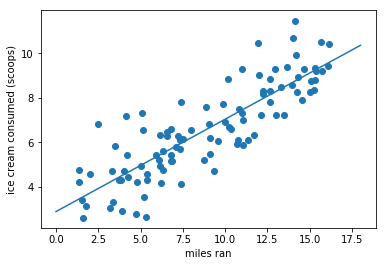

In [33]:
plt.scatter(xs, ys)
x2 = np.arange(19)
plt.plot(x2, ((Bhat*x2)+y_int), '-')
plt.xlabel("miles ran")
plt.ylabel("ice cream consumed (scoops)")
plt.show()

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

there is clearly a positive correlation in the data, because when he runs more miles, he eats more ice cream in general, however the pattern still has some real variation and so I would say its a correlation of modest to strong in terms of the r-value. 

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

In [37]:
est = (Bhat*26.2) + y_int
print("predicted ice cream intake for a marathon: ", est)

Bhat*240 + y_int

predicted ice cream intake for a marathon:  13.767445170097925


102.60842728455277

it predicts that if he runs 26.2 miles that he will eat 13.767 scoops of ice cream. The drawback is that at some point a human being can only eat so much ice cream and so in reality the increase in scoops eaten will start to taper off to a constant amount being something like how much ice cream the human stomach can even fit at any one 24 hour period, and eventially the linear correlation will no longer be informative, that is our prediction will overshoot the results if he for instance ran a ultramarathon of 240 miles; it is not likely that he would eat 102 scoops of ice cream!!!

**Part E:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result.

first we need the zalpha level for 66% CI which should be the  number of standard deviations you have to go our from the center to capture 66% of all the data, looking it up on the internet I found a table which gave me back 0.954; so almost 1 SD out from the center of a standard normal in either direction. 

now, lets run through calculating $\hat{B} - 0.954(\frac{\sigma_y}{\sqrt{10}})$

I still let python do most of the work here, I hope that is alright. 

In [43]:
z_alpha = 0.954
print(z_alpha)

lo = Bhat - (z_alpha)*(np.std(ys)/np.sqrt(10))
hi = Bhat + (z_alpha)*(np.std(ys)/np.sqrt(10))
print("we are 66% confident that the value is between", lo, hi)

0.954
we are 66% confident that the value is between -0.21059635999445042 1.0416626098958053


**Part F**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

not really, we have a pretty consice data set of a dependent variable that seems to concievably be dependent on just one thing; how many miles he ran.